**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

### Import STARR/MPRA RankNorm

**Check files**

In [5]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.ranknorm.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.aggregate.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.overlap.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.overlap.starrmpra.tsv 


**Read tables**

In [6]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.ranknorm.overlap.starrmpra.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_ranknorm_starrmpra_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3376    8

$fcc_astarr_macs_input_union
[1] 4948    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.34155069,0.7425860,0.4850237
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.07952676,0.5871886,0.8161329
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.47689108,0.8007117,0.6684460


### Import STARR/MPRA Scores

**Check files**

In [7]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.score.fcc.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.final.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.test.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.total.tsv 


**Read tables**

In [9]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
    txt_fname = "region.coverage.score.fcc.final.tsv"
    #txt_fname = "region.coverage.score.fcc.test.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_fcc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432928     11

$fcc_astarr_macs_input_union
[1] 639718     11



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-2.23485265,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.03179044,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-1.33934060,-2.1376311,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


**Check: score label**

In [15]:
lst = lst_dat_region_score_fcc_import
lst = lapply(lst, function(dat){
    res = table(dat$Assay_Label, dat$Score_Label, dnn=c("Assay_Label", "Score_Label"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% dplyr::filter(Freq != 0) %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay_Label,Score_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR,Log2FC,150040,246850
CRISPRi-Growth,Mean(ZScore),72743,80288
CRISPRi-HCRFF,Mean(ZScore),925,1330
LMPRA,Log2FC,61478,68497
TMPRA,Log2FC,1148,1722
WSTARR,Log2FC,146594,241031


## Order and range of regions

**Get the sorted regions**

In [9]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of region
    dat = lst_dat_region_ranknorm_starrmpra_import[[txt_folder]]
    dat = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region = dat$Region

    return(vec_txt_region)
})

### assign and show
lst_vec_txt_region_sorted = lst

res = lapply(lst, length)
print(res)

vec = lst[[1]]
head(vec, 3)

$fcc_astarr_macs_input_overlap
[1] 844

$fcc_astarr_macs_input_union
[1] 1237



[1] "chrX:48573742-48575170"  "chr11:34234056-34234496"
[3] "chrX:49039753-49040214"

## Plotting style

In [10]:
THEME_TEXT = theme(
    plot.title   = element_text(size = 17, face = "bold"),
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)

## Plot STARR/MPRA (RankNorm)

**Arrange tables**

In [11]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
    vec_txt_assay = rev(vec_txt_assay)

    ### set the order of region
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### renew factor level based on the order
    dat = lst_dat_region_ranknorm_starrmpra_import[[txt_folder]]
    dat = dat %>%
        dplyr::filter(Region %in% vec_txt_region) %>%
        dplyr::mutate(
            Assay  = factor(Assay,  levels=vec_txt_assay),
            Region = factor(Region, levels=vec_txt_region),
        )
    return(dat)
})

### assign and show
lst_dat_region_ranknorm_starrmpra_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3376    8

$fcc_astarr_macs_input_union
[1] 4948    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.34155069,0.7425860,0.4850237
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.07952676,0.5871886,0.8161329
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.47689108,0.8007117,0.6684460


**Generate plots**

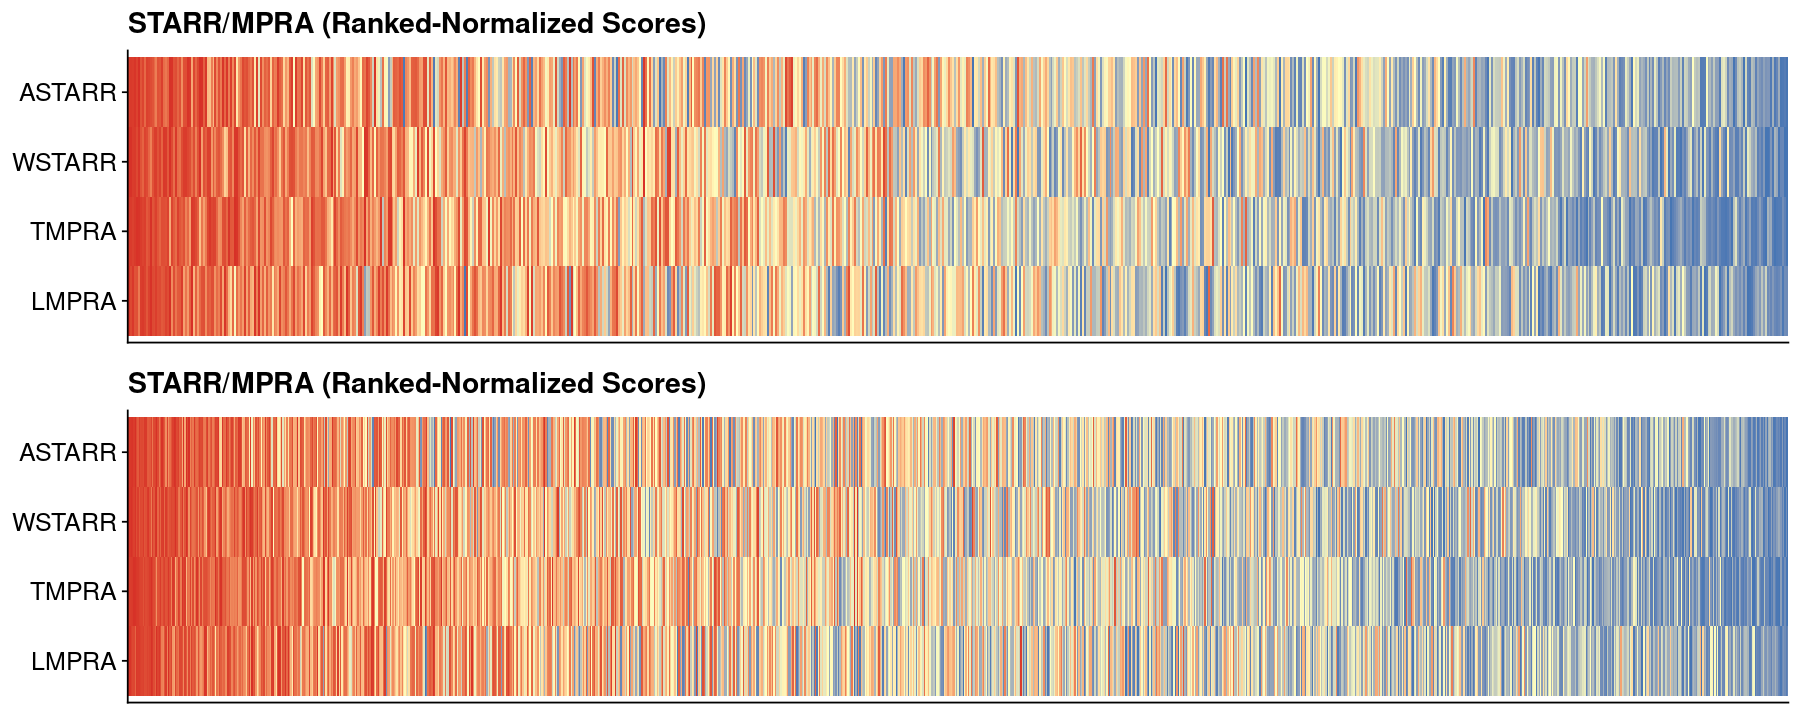

In [12]:
### set plot style
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5,
    limits   = c(0, 1), # force the data range
    oob      = scales::squish 
)
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_ranknorm_starrmpra_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Assay, fill=RankNorm)) +
        geom_tile() +
        labs(title = "STARR/MPRA (Ranked-Normalized Scores)") +
        theme_cowplot() + 
        theme_text +
        theme_fill +
        theme_legend
    return(gpt)
})

### assign and show
lst_gpt_region_ranknorm_starrmpra = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Plot STARR/MPRA (Score)

**Arrange tables**

In [16]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
    #vec_txt_assay = rev(vec_txt_assay)

    ### set the order of region
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]
    
    ### filter and renew factor level based on the order
    dat = lst_dat_region_score_fcc_import[[txt_folder]]
    dat = dat %>%
        dplyr::mutate(Assay = Assay_Label) %>%
        dplyr::filter(
            Assay  %in% vec_txt_assay,
            Region %in% vec_txt_region
        ) %>%
        dplyr::mutate(
            Assay  = factor(Assay,  levels = vec_txt_assay),
            Region = factor(Region, levels = vec_txt_region),
        )
})

### assign and show
lst_dat_region_score_starrmpra_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3376   12

$fcc_astarr_macs_input_union
[1] 4948   12



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label,Assay
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
chr11,4551522,4551988,chr11:4551522-4551988,-0.1224555,-0.2666798,Log2FC,Scale(Log2FC),MPRA_Tiling_K562_Tewhey_Hannah,TMPRA,TMPRA,TMPRA
chr11,4551522,4551988,chr11:4551522-4551988,0.3415507,0.5272279,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR,ASTARR
chr11,4551522,4551988,chr11:4551522-4551988,-0.1099597,-0.2447780,Log2FC,Scale(Log2FC),STARR_WHG_K562_Reddy_A001,WSTARR,WSTARR,WSTARR


**Generate plots**

In [17]:
### set plot style
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### set title
vec_txt_assay = c("ASTARR", "WSTARR", "LMPRA", "TMPRA")
vec_txt_title = c("ASTARR (Log2FC)", "WSTARR (Log2FC)", "LMPRA (Log2FC)", "TMPRA (Log2FC)")
names(vec_txt_title) = vec_txt_assay
                  
### generate the plot
lst = lst_dat_region_score_starrmpra_arrange
lol = lapply(lst, function(dat){
    
    lst = split(dat, dat$Assay)
    lst = lapply(lst, function(dat){
        idx = as.character(unique(dat$Assay))
        txt = vec_txt_title[idx]
        
        gpt = ggplot(dat, aes(x=Region, y=Score)) + 
            geom_col(width=2, position="identity") + 
            theme_cowplot() + 
            theme_text +
            theme_legend +
            labs(title = txt)
    })
    return(lst)
})

### assign and show
lol_gpt_region_score_starrmpra = lol

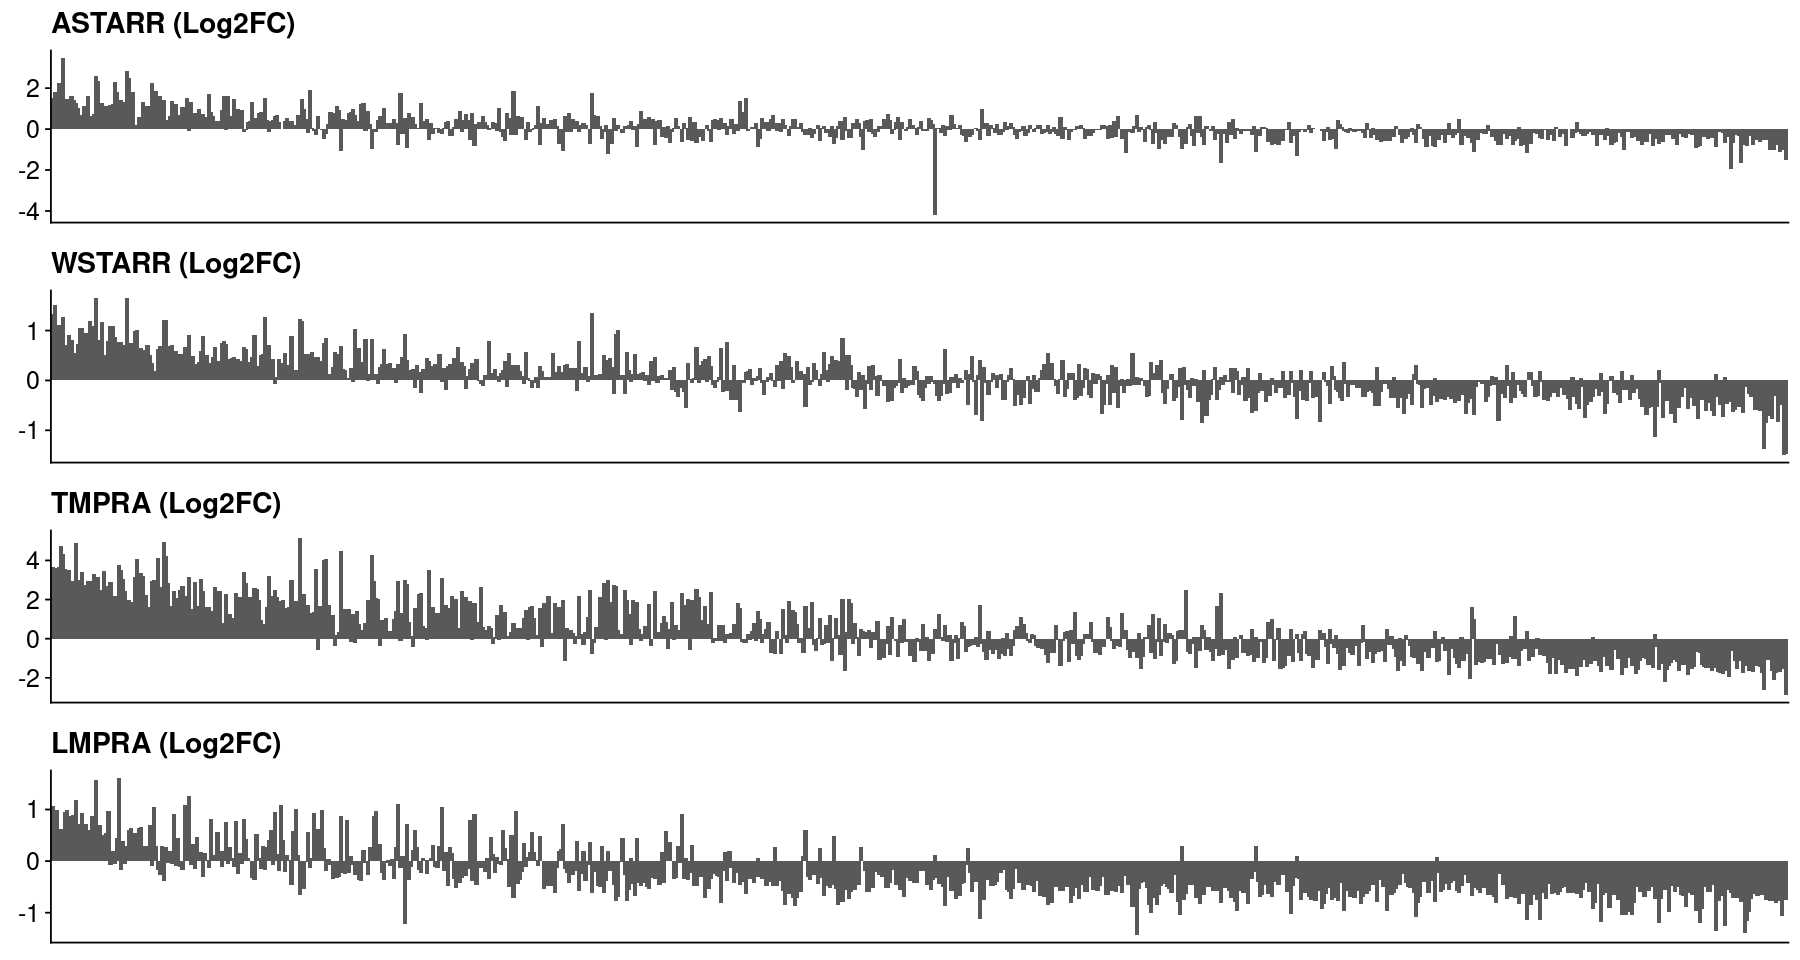

In [18]:
idx = "fcc_astarr_macs_input_overlap"
lol = lol_gpt_region_score_starrmpra
lst = lol[[idx]]
plt = plot_grid(plotlist = lst, ncol = 1, align = "v")

options(repr.plot.height=8, repr.plot.width=15)
print(plt)

## Combine STARR/MPRA RankNorm and Scores

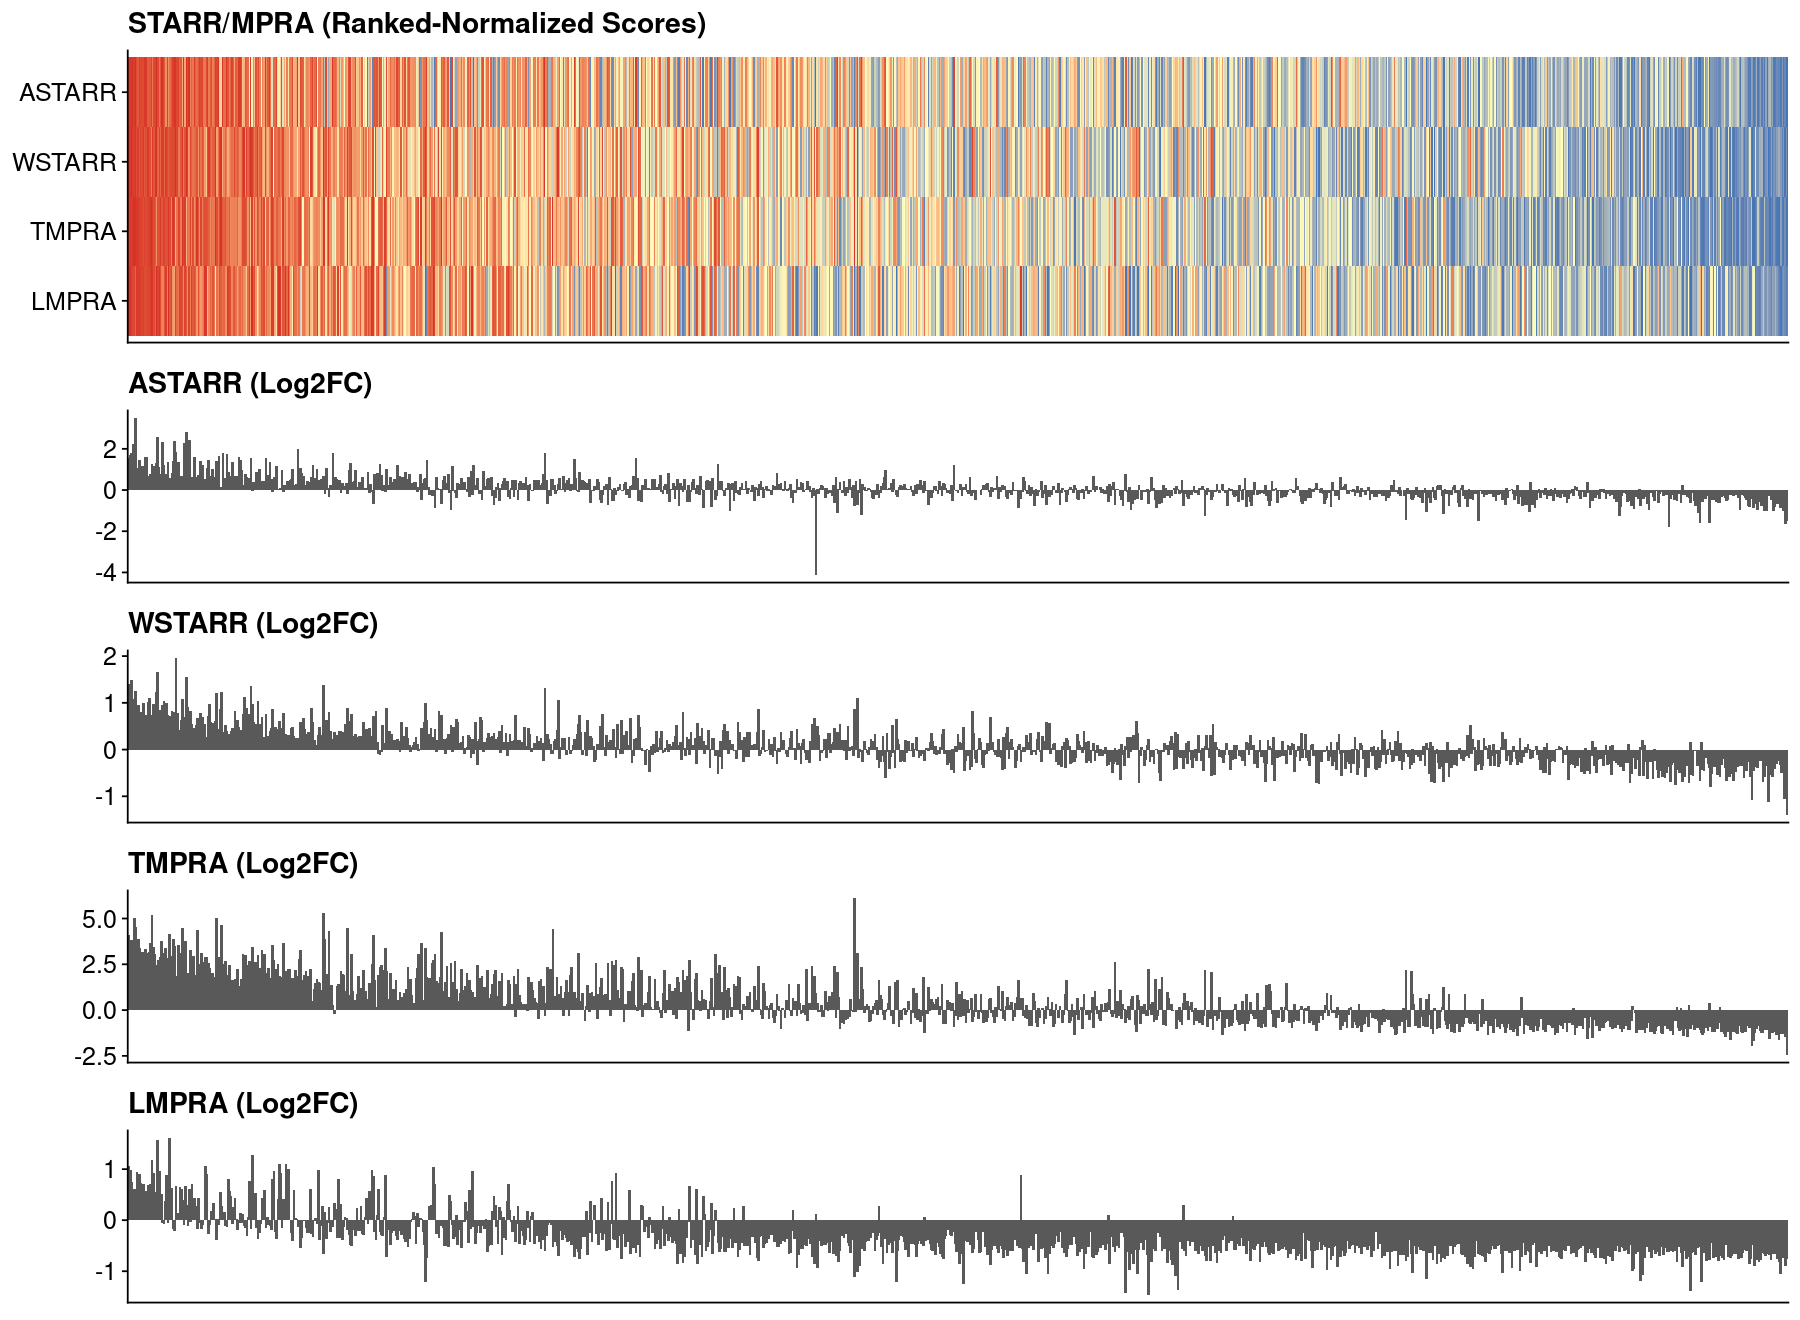

In [19]:
### init
idx = "fcc_astarr_macs_input_union"

### get plots for STARR/MPRA RankNorm
lst = lst_gpt_region_ranknorm_starrmpra
gpt = lst[[idx]]

### get plots for STARR/MPRA Scores
lol = lol_gpt_region_score_starrmpra
lst = lol[[idx]]

### combine plots
lst = c(list(gpt), lst)

### generate plot
vec = c(1.5, 1, 1, 1, 1)
plt = plot_grid(
    plotlist = lst, 
    rel_heights = vec,
    ncol  = 1,
    align = "v"
)

### assign and show
plt_region_score_combine = plt
options(repr.plot.height=sum(vec)*2, repr.plot.width=15)
print(plt)

## Export plots

In [20]:
print(sum(vec)*2)

[1] 11


In [ ]:
plt_export = gpt_export_ranknorm_starrmpracrispr
txt_export = "fig.region_coverage_fcc.combine.starrmpra_ranknorm.starrmpra_log2fc"
num_height = sum(vec)*2
num_width  = 15

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")